In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import re

import glob
%matplotlib inline

In [29]:
dire='E:\Olivia files\LAB\PROJECTS\C-trap things\\190913 ssDNA RPA-DBD\\'

files = glob.glob(dire+'\*kymograph*.h5')
print("molecule options:",end =" ")
for f in files:
    key=re.findall(r"[\d]*(?=\.)",f)[0]
    print(key,end =" ")
k=input("which molecule to look at? ")
for f in files:
    if re.search((' '+k+'\.'),f):
        filename=f
        print('opening '+filename)

# open file
file = pylake.File(filename)
kymos = list(file.kymos)
kymo_data = file.kymos[kymos[0]]
kymo = file.kymos[kymos[0]]

molecule options: 1 2 3 4 5 6 7 8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 7 8 9 which molecule to look at? 22
opening E:\Olivia files\LAB\PROJECTS\C-trap things\190913 ssDNA RPA-DBD\20190913-184226 Kymograph 22.h5


In [6]:
#alternative opening method
dire='/mnt/e/Olivia files/LAB/PROJECTS/C-trap things/190822 sytox dsDNA to ssDNA/'
files = glob.glob(dire+'*Kymograph*.h5')
for file_name in files:
    #print(file_name)
    file = pylake.File(file_name)
    #print(file)
    key = list(file.kymos.keys())[0]
    print(key,end =" ")
k=input("which molecule to look at? ")
for f in files:
    if re.search(r'\s' + k+'\.',f):
        filename=f
        print('opening '+filename)

# open file
file = pylake.File(filename)
kymos = list(file.kymos)
kymo_data = file.kymos[kymos[0]]
kymo = file.kymos[kymos[0]]

which molecule to look at? 


NameError: name 'filename' is not defined

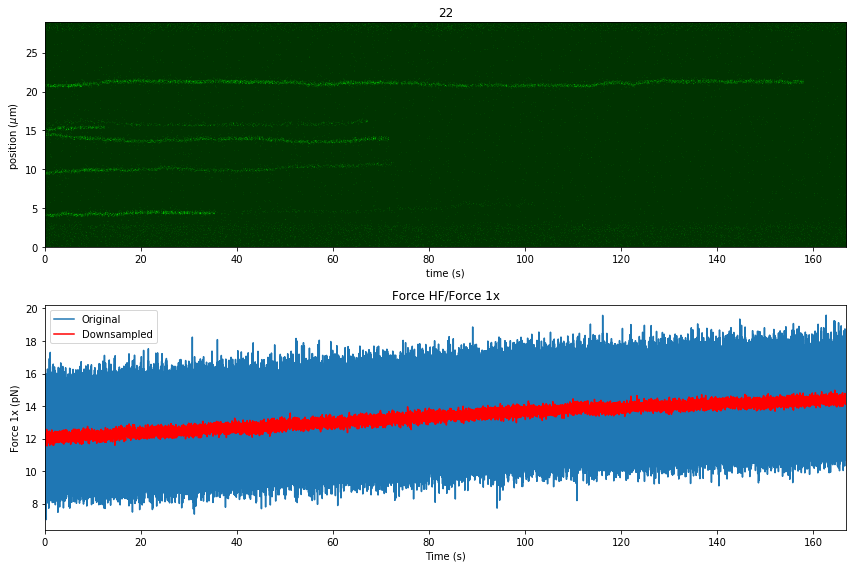

In [30]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
kymo.plot_green(vmax=16,vmin=-4,aspect='auto')   #this is the best looking vmax/vmin combo so far

plt.subplot(2,1,2)
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

#if you want to save
plt.savefig(dire+'kymo+force-'+k+'.png')

In [81]:
fcx1=file['Force LF']['Force 1x']
time1=fcx1.timestamps
sp=fcx1.sample_rate
print(sp)

None


MED: [19.193856] [-1.07611351]
MED: [19.26383376] [-1.31640834]
MED: [21.81301761] [-1.02224834]
MED: [38.68761611] [-1.00050393]
 BIG: [41.04686093] [-38.36140448]
 BIG: [41.05685759] [-23.62234525]
time till break = [19.65300493]
time till break2 = [-21.393856]


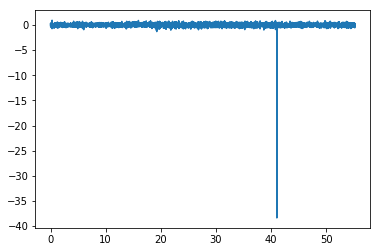

In [5]:
from numpy import diff
#derivative from downsampled data
tim=time_downsamp
fxd=forcex_downsamp.data

dy=diff(fxd)

last,tim=tim[-1],tim[:-1]
last,tim

fig=plt.figure()
plt.plot(tim,dy)

dist=5.5;rate=2.5
ramptime=dist/rate
tcs=0
tbr=0;tbr2=0
for d in dy:
    inde=np.where(dy==d)
    if abs(d)>3:
        print(" BIG: "+str(tim[inde])+' '+str(dy[inde]))
        if tbr==0:
            tbr=tim[inde]
        if tbr!=0 and round(tim[inde][0])!=round(tbr[0]):
            tbr2=tim[inde]
    if 1.< abs(d) <= 3:
        print("MED: "+str(tim[inde])+' '+str(dy[inde]))
        if tcs==0:
            tcs=tim[inde]

print('time till break = '+str(tbr-tcs-ramptime))
print('time till break2 = '+str(tbr2-tcs-ramptime))
        